###**Task-5 To Explore Business Analtyics**
*Perform ‘Exploratory Data Analysis’ on the provided dataset
‘SampleSuperstore’.
You are the business owner of the retail firm and want to see
how your company is performing. You are interested in finding
out the weak areas where you can work to make more profit.
What all business problems you can derive by looking into the
data? You can choose any of the tool of your choice
(Python/R/Tableau/PowerBI/Excel)*

*Let's Kick-start Our Task by Importing Useful Libraries*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


*Importing Data set from Google Drive* 

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
%cd "/content/drive/My Drive/Colab Notebooks"

/content/drive/My Drive/Colab Notebooks


In [ ]:
data_set=pd.read_csv("SampleSuperstore.csv")
data_set.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


###**Check for Null/NAN entries**

In [ ]:
data_set.isna().any()

Ship Mode       False
Segment         False
Country         False
City            False
State           False
Postal Code     False
Region          False
Category        False
Sub-Category    False
Sales           False
Quantity        False
Discount        False
Profit          False
dtype: bool

###**Now Let's Look at Various Data Types We are Working on**

In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


*From above we notice features  Sales, Quantity, Discount, Profit, Postal-code are numeric values hence we need them to be in int or float types. Others such as Country, City are simply objects. Now let's proceed to data visualization section*

## **Visualizing Our Data Set**

###**Popular Shipping Modes**


*Checking on modes of various orders placed at the firm*

Text(0, 0.5, 'Number of orders')

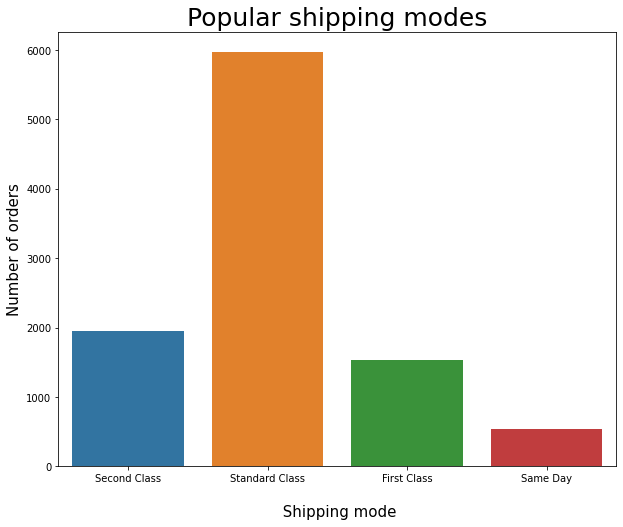

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot('Ship Mode',data=data_set)

plt.title('Popular shipping modes',size=25)
plt.xlabel('\n Shipping mode',size=15)
plt.ylabel('Number of orders',size=15)
#plt.xticks(fontsize=15)

*As we can see most of the customers prefer standard class shipping mode and very less customers prefer same day delivery as it may cost premium charges.*

###**Shipping Modes of Each Segment**

*Let us also check who are the primary customer segments for each of these different shipping modes.*

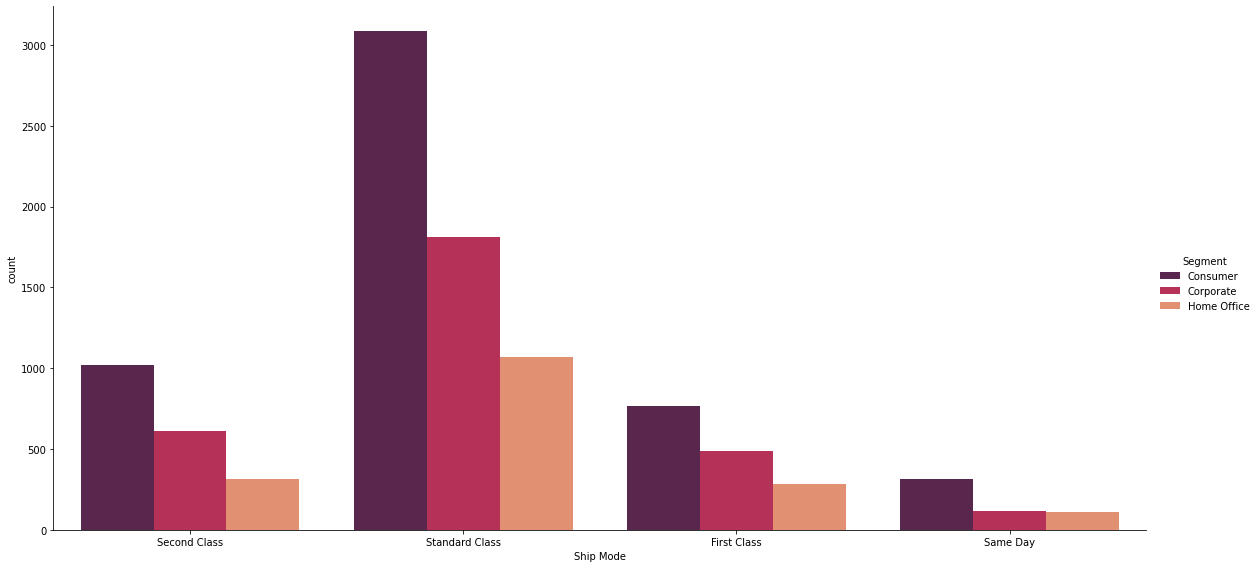

In [ ]:
sns.catplot('Ship Mode',hue='Segment',data=data_set,kind='count',palette='rocket',aspect=2,height=8)

*From the above plot we can notice that maximum number of consumers primarily prefer standard class delivery, but it is also interesting to note that in highest number of orders for other shipment modes(Second class, First Class, Same Day) consumer segment is leading.The reason could be, individual consumers are always in higher numbers compared to Corporate or Home offices.*

###**Quantities Ordered**

In [ ]:
quantities_ordered=data_set.groupby('Segment')['Quantity'].sum().reset_index()

In [ ]:
quantities_ordered

,Segment,Quantity
0,Consumer,19521
1,Corporate,11608
2,Home Office,6744


*Visualizing above data as a  pie chart*

Text(0.5, 1.0, 'Quantities Ordered by each segment')

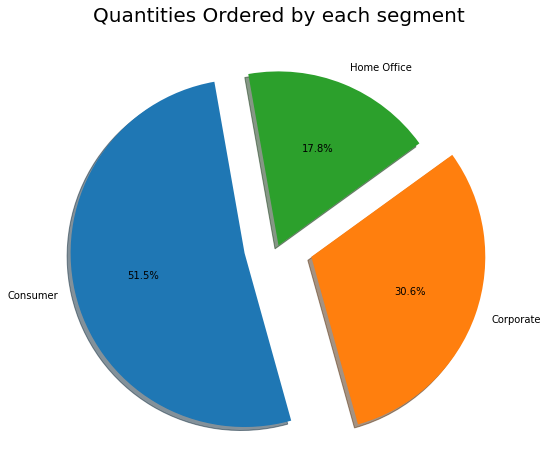

In [ ]:
labels=data_set['Segment'].unique()
plt.figure(figsize=(10,8))
plt.pie(quantities_ordered['Quantity'],autopct="%1.1f%%",labels=labels,explode=(0.2,0.2,0),shadow=True,startangle=100)
plt.title("Quantities Ordered by each segment",size=20)

###**Quantities Ordered by Each State**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text major ticklabel objects>)

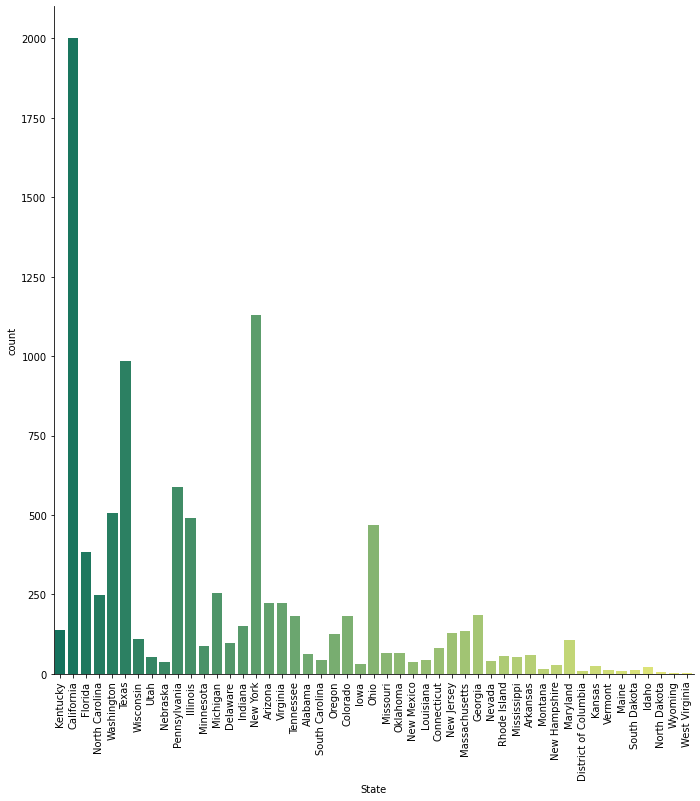

In [ ]:
sns.catplot('State',kind='count',data=data_set,palette="summer",height=10,aspect=1)
plt.xticks(rotation=90)

*Now let's check the top ten cities with highest number of orders by quantities*

In [ ]:
top10cities=data_set.groupby('City')['Quantity'].sum().reset_index().sort_values(by='Quantity',ascending=False)

In [ ]:
df_top10=top10cities.head(10)
df_top10.reset_index(inplace=True,drop=True)
df_top10.head(10)

,City,Quantity
0,New York City,3417
1,Los Angeles,2879
2,Philadelphia,1981
3,San Francisco,1935
4,Seattle,1590
5,Houston,1466
6,Chicago,1132
7,Columbus,836
8,San Diego,670
9,Springfield,649


*Now let's plot the above conclusion*

Text(0.5, 1.0, 'Top 10 Cities by Quantities Ordered')

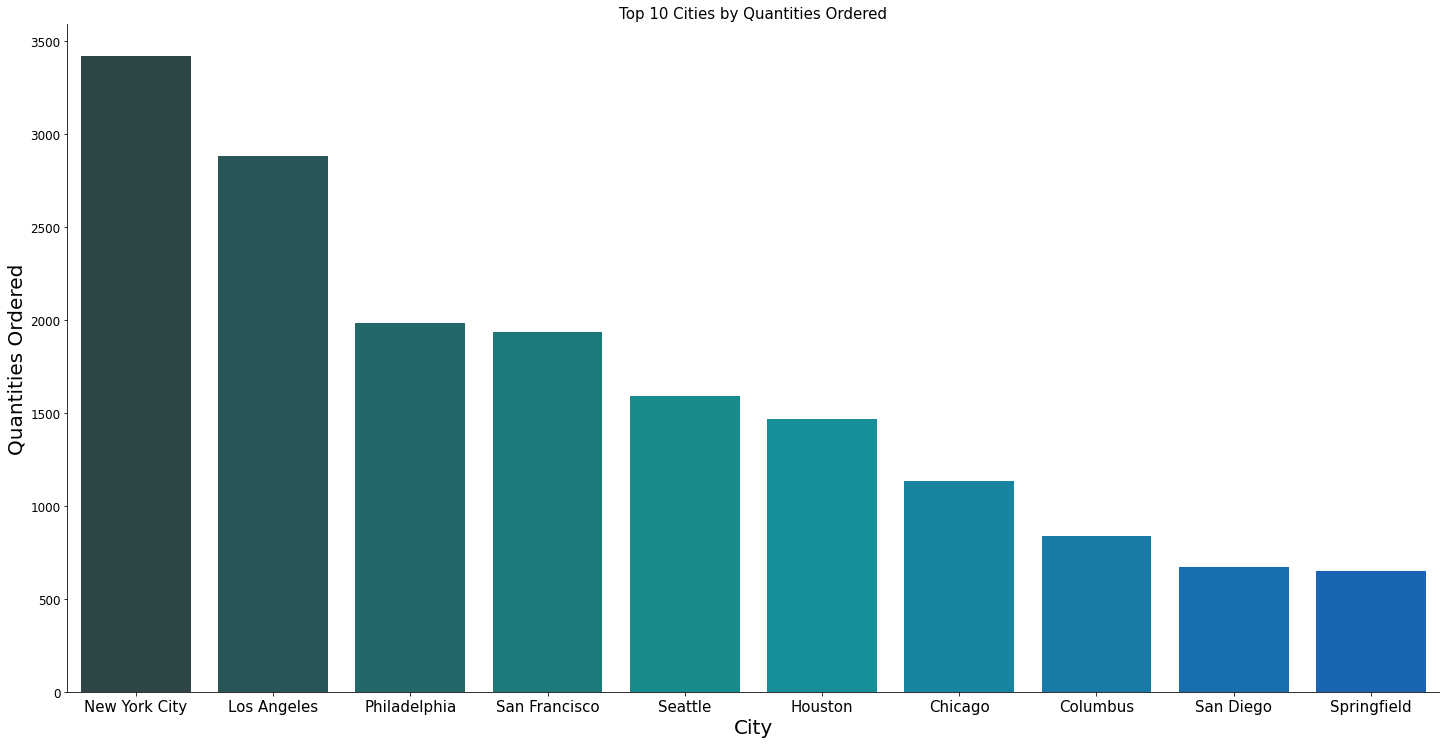

In [ ]:
sns.catplot('City','Quantity',data=df_top10,kind='bar',height=10,aspect=2,palette='winter_d')
plt.xlabel("City",size=20)
plt.ylabel("Quantities Ordered",size=20)
plt.xticks(size=15,rotation=0)
plt.yticks(size=12)
plt.title("Top 10 Cities by Quantities Ordered",size=15)

Here, we observe New York City has ordered most number of quantities and Springfield and San Diego least.

*Now let us check which regions have ordered most number of quantities. This can help us understand where we must focus to improve our sales.*

In [ ]:
df_region=data_set.groupby('Region')['Quantity'].sum().reset_index()

In [ ]:
df_region


,Region,Quantity
0,Central,8780
1,East,10618
2,South,6209
3,West,12266


###**Quantities Ordered Region-wise**

Text(0.5, 1.0, 'Quantites Ordered by each Region')

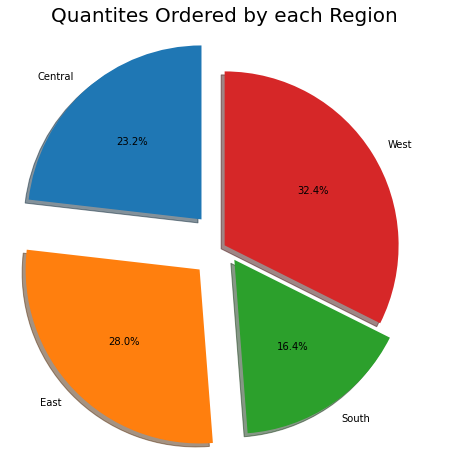

In [ ]:
labels=df_region['Region'].unique()
plt.figure(figsize=(10,8))
plt.pie(df_region['Quantity'],autopct="%1.1f%%",shadow=True,explode=(0.2,0.2,0.1,0),startangle=90,labels=labels)
plt.title("Quantites Ordered by each Region",size=20)

*From above we can depict that South is lagging behind on number of quantities being sold and West region sales has outperformed other regions.*

####**Most Selling Categories**

*Let us check which category of items is being ordered the highest in terms of quantities. We will visualize the same as as pie-chart*

In [ ]:
df_category=data_set.groupby('Category')['Quantity'].sum().reset_index()
df_category

,Category,Quantity
0,Furniture,8028
1,Office Supplies,22906
2,Technology,6939


Text(0.5, 1.0, 'Distibution of Products Sold by Quantities')

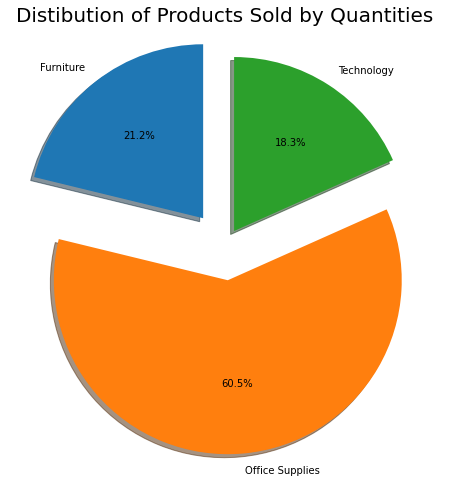

In [ ]:
plt.figure(figsize=(10,8))
plt.pie('Quantity',data=df_category,labels=df_category['Category'],autopct='%1.1f%%',startangle=90,shadow=True,explode=(0.2,0.2,0.1))
plt.title("Distibution of Products Sold by Quantities",size=20)


*As we can see 60.5% sales are from office supplies followed by 21.2% Furniture and 18.3% from Technology products*

*Now let us dive deeper and visualize the number of each sub-category belonging products sold*

Text(0.5, 20.799999999999983, 'Category')

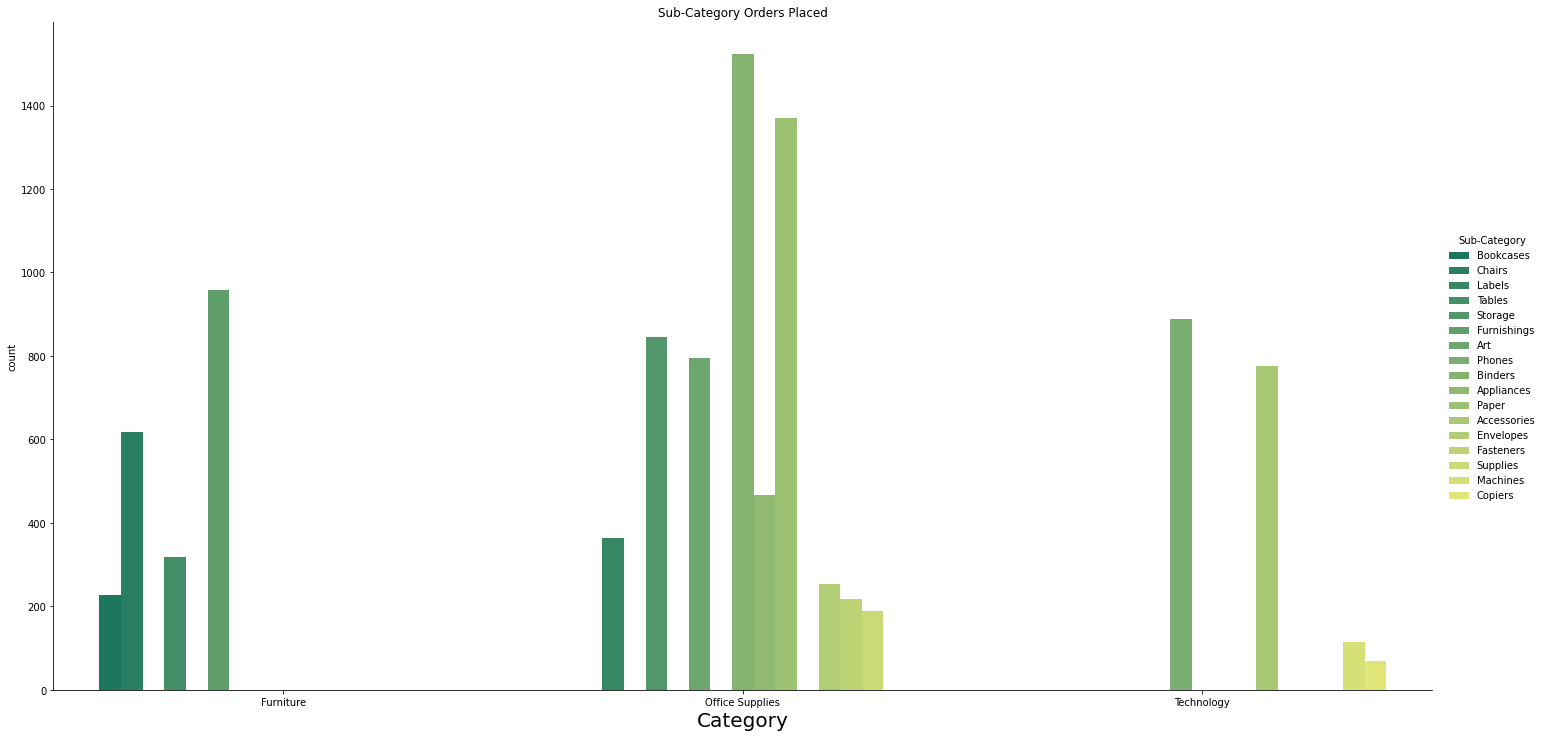

In [ ]:
sns.catplot('Category',kind='count',hue='Sub-Category',height=10,aspect=2,data=data_set,palette='summer')
plt.title("Sub-Category Orders Placed")
plt.xlabel('Category',size=20)

*From above we can conclude that top selling sub-categories from:*



*Furniture is Furnishings*

*Office Supplies are Papers and Binders*

*Technology is Accessories*

####**Profitable Categories**

*Let us check which category had the highest profits*


In [ ]:
df_profits=data_set.groupby('Category')['Profit'].sum().reset_index()
df_profits

,Category,Profit
0,Furniture,18451.2728
1,Office Supplies,122490.8008
2,Technology,145454.9481


Text(0.5, 1.0, 'Distibution of Profits Category wise')

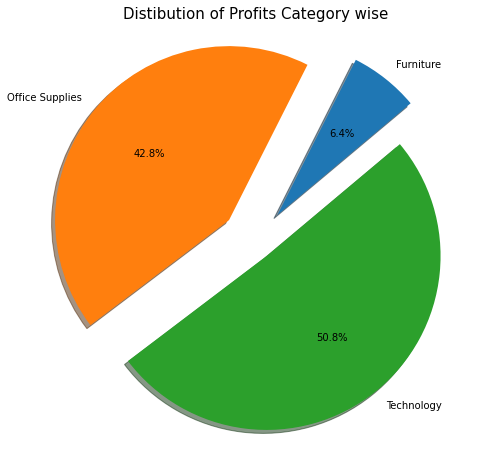

In [ ]:
plt.figure(figsize=(10,8))
plt.pie('Profit',labels=df_profits['Category'],data=df_profits,autopct='%1.1f%%',shadow=True,explode=(0.2,0.2,0.1),startangle=40)
plt.title('Distibution of Profits Category wise',size=15)

From above we can conclude that profits made from technology items and office supploes are 50.8% and 42.8% respectively and profits made from furnitures is only 6.4%

####**Identifying top 10 profitable selling items**

In [ ]:
df_top_10_profitable_items=data_set.groupby('Sub-Category')['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False)
df_top_10_profitable_items.reset_index(drop=True,inplace=True)
df_top_10_profitable_items=df_top_10_profitable_items.head(10)


Text(-8.700000000000003, 0.5, 'Cumulative Profit')

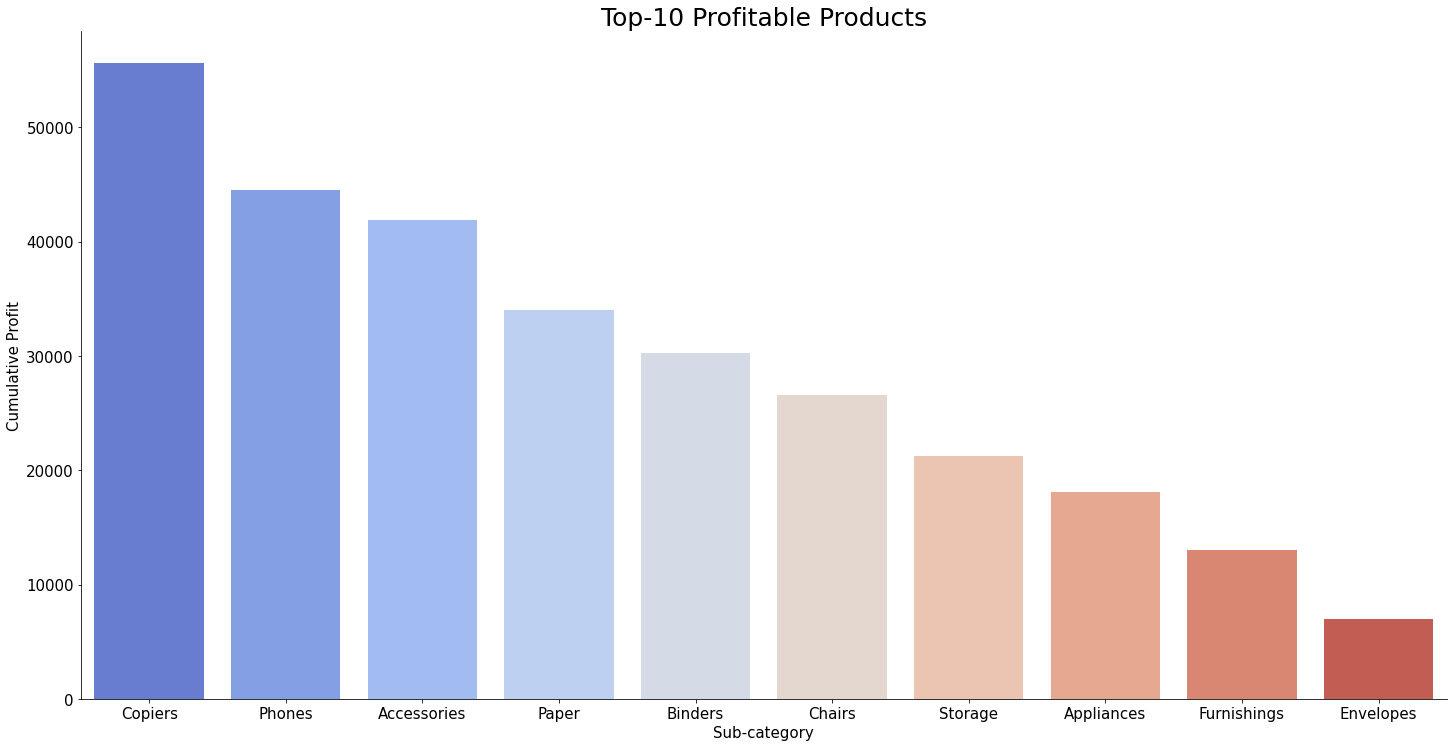

In [ ]:
sns.catplot('Sub-Category','Profit',data=df_top_10_profitable_items,kind='bar',height=10,aspect=2,palette='coolwarm')
plt.xticks(size=15)
plt.yticks(size=15)
plt.title("Top-10 Profitable Products",size=25)
plt.xlabel('Sub-category',size=15)
plt.ylabel("Cumulative Profit",size=15)

As we can see copiers are the most profitable products sold by our company

###**Top Profitable Cities**
*Let us now check where are the profits mainly coming from. We will try to visualise the top 10 profitable cities.*

In [ ]:
df_top_10_cities=data_set.groupby('City')['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False)
df_top_10_cities=df_top_10_cities.head(10)


Text(-8.700000000000003, 0.5, 'Cumulative Profit')

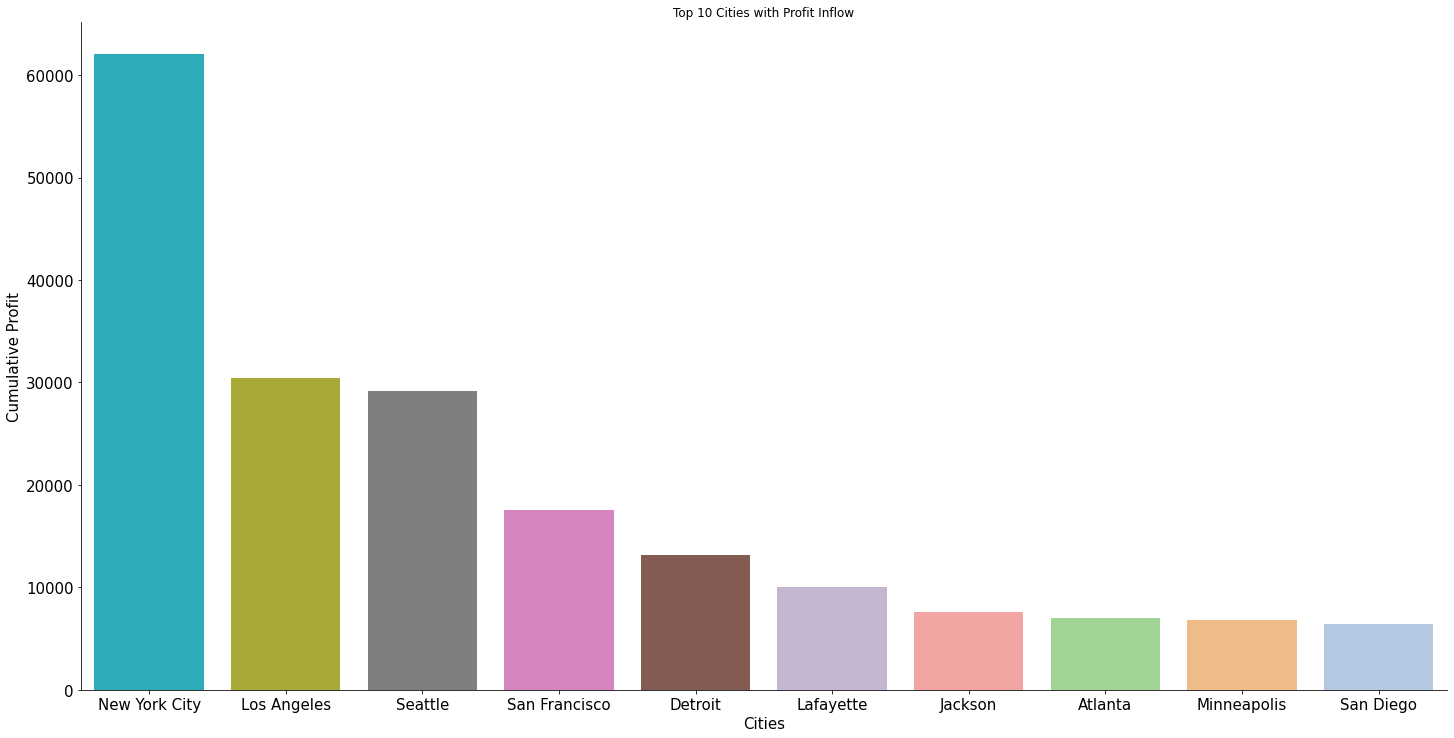

In [ ]:
sns.catplot('City','Profit',kind='bar',data=df_top_10_cities,height=10,aspect=2,palette='tab20_r')
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Top 10 Cities with Profit Inflow')
plt.xlabel('Cities',size=15)
plt.ylabel('Cumulative Profit',size=15)


*From above we can conclude that New York City has highest profits followed by Los Angeles and Seattle . This can be due to large number of corporate offices present in New York City.Moreover , NYC has dense population hence revenue is expected to be higher in this region :)*